# Amenity filter

This notebook helped explore a way to __filter cultural/social amenities by nom_estab__ in order to integrate changes into the 2024 proximity analysis.

The __output_ at the end of this notebook is a __gdf__ containing the __time (proximity) to each amenity (source) from each node__. (nodes_proximity_2020 for updated amenities)

## Import libraries

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/jovyan/accesibilidad-urbana/aup/data.py:25: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


## Part 1: Amenity filter

In [2]:
# Location of centro_cultural points of interest
centro_cultural_dir = "../../../data/external/temporal_todocker/proximity_v2/denue_centrocultural_mty.gpkg"

# Location of denue_dif points of interest
dif_dir = "../../../data/external/temporal_todocker/proximity_v2/denue_dif_mty.gpkg"

### a) Filter cultural pois according to analysis

In [3]:
# Read points of interest (pois)
centro_cultural = gpd.read_file(centro_cultural_dir)
centro_cultural = centro_cultural.set_crs("EPSG:4326")

# Filter for public cultural amenities (private are more variable and less accurate)
pois_cultural = centro_cultural.loc[centro_cultural.codigo_act == 711312.0]

# Somehow there
pois_cultural = pois_cultural.explode()
pois_cultural = pois_cultural.droplevel(1)

#Show
print(pois_cultural.shape)
pois_cultural.head(1)

(50, 42)


,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipo_uni_eco,latitud,longitud,fecha_alta,geometry
0,8419714.0,CASA DE LA CULTURA,GOBIERNO,711312.0,Promotores del sector público de espectáculos ...,0 a 5 personas,CALLE,LICENCIADO BENITO JUAREZ,CALLE,FRANCISCO I. MADERO,...,0021,31.0,nan,None,None,Fijo,25.945332,-100.39991,2019-11,POINT (-100.39991 25.94533)


In [4]:
amenities_ofinterest = ['CENTRO',
                      'CULTURA', #incluye CULTURAL
                      'LIENZO',
                      'PLAZA',
                      'ARENA',
                      'AUDITORIO',
                      'TEATRO',
                      'ARTE', # incluye ARTES
                      'MUSEO']

centro_cultural_filtered = gpd.GeoDataFrame()

for amenity in amenities_ofinterest:
    pois_f = pois_cultural.loc[pois_cultural['nom_estab'].str.contains(amenity, regex=False)]
    centro_cultural_filtered = pd.concat([centro_cultural_filtered, pois_f])

centro_cultural_filtered.drop_duplicates(inplace=True)
    
#Show
print(centro_cultural_filtered.shape)
print(centro_cultural_filtered.codigo_act.unique())
print(centro_cultural_filtered.nom_estab.unique())
centro_cultural_filtered.head(1)

(43, 42)
[711312.]
['CENTRO CIVICO METROPLEX' 'CENTRO CULTURALROSA DE LOS VIENTOS'
 'ARCHVO HISTORICO Y CENTRO CULTURAL URBANO'
 'CENTRO CULTURAL PLAZA FATIMA' 'CENTRO CIVICO' 'CENTRO CULTURAL BAM'
 'CENTRO CULTURAL LA PERGOLA' 'CENTRO DE LAS ARTES II'
 'CASA DE LA CULTURA'
 'CASA DE LA CULTURA PROFESORA MARÍA VILLARREAL DE BARRERA'
 'CASA DE CULTURA' 'CASA DE LA CULTURA LICENCIADO MANUEL GOMEZ MORIN'
 'CASA DE LA CULTURA EFRAÍN DÍAZ DE LA GARZA' 'CASA DE CULTURA SAN PEDRO'
 'CASA DE LA CULTURA LA CIMA' 'CASA DE LA CULTURA VISTA MONTAÑA'
 'ESTACIONAMINETO DE LA CASA DE CULTURA'
 'CONSEJO PARA LA CULTURA Y LA ARTES I I I'
 'INSTITUTO MUNICIPAL DE DESARROLLO CULTURAL'
 'TALLER PERMANENTES DE LA CASA DE LA CULTURA'
 'LIENZO CHARRO FELIX CARDENAS' 'LIENZO CHARRO MUNICIPAL'
 'PLAZA CUATRO CAMINOS' 'PLAZA DE TOROS CADEREYTA'
 'AUDITORIO MUNICIPAL COLINAS DEL AEROPUERTO'
 'AUDITORIO MUNICIPAL EL CARMEN' 'AUDITORIO SAN PEDRO'
 'AUDITORIO MUNICIPAL MARIANO ESCOBEDO'
 'AUDITORIO MUNICIPAL DE CAR

,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipo_uni_eco,latitud,longitud,fecha_alta,geometry
3,2947834.0,CENTRO CIVICO METROPLEX,MUNICIPIO DE APODACA,711312.0,Promotores del sector público de espectáculos ...,0 a 5 personas,CALLE,N31,AVENIDA,METROPLEX,...,087A,2.0,8183829121.0,None,None,Fijo,25.7951,-100.2535,2014-12,POINT (-100.25350 25.79510)


In [5]:
centro_cultural_final = centro_cultural_filtered[['codigo_act','geometry']]

centro_cultural_final.to_file("../../../data/external/temporal_fromjupyter/proximity_v2/denue_centrocultural_filtered.gpkg", driver='GPKG')

### b) Filter dif pois according to analysis

In [6]:
# Read points of interest (pois)
dif = gpd.read_file(dif_dir)
dif = dif.set_crs("EPSG:4326")

#Show
print(dif.shape)
dif.head(1)

(451, 43)


,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,manzana,telefono,correoelec,www,tipo_uni_eco,latitud,longitud,fecha_alta,Utilidad,geometry
0,3050055.0,ACTIVIDADES ADMINISTRATIVAS DE INSTITUCIONES D...,DIF NUEVO LEÓN,931610.0,Actividades administrativas de instituciones d...,0 a 5 personas,CALLE,CIUDAD DE GUAYMAS,CALLE,DECRETO PRESIDENCIAL,...,4.0,nan,None,None,Fijo,25.75152,-100.38762,2010-07,1,POINT (-100.38762 25.75152)


### Evaluate

In [7]:
situacion_actual = dif.groupby('Utilidad').count()
situacion_actual = situacion_actual[['id']]
situacion_actual.reset_index(inplace=True)
situacion_actual.loc[(situacion_actual['Utilidad'] == -3),'Utilidad'] = 'otros'
situacion_actual.loc[(situacion_actual['Utilidad'] == -2),'Utilidad'] = 'oficina'
situacion_actual.loc[(situacion_actual['Utilidad'] == -1),'Utilidad'] = 'bodega'
situacion_actual.loc[(situacion_actual['Utilidad'] == 0),'Utilidad'] = 'no encontrado'
situacion_actual.loc[(situacion_actual['Utilidad'] == 1),'Utilidad'] = 'parque con casita'
situacion_actual.loc[(situacion_actual['Utilidad'] == 2),'Utilidad'] = 'apoyo escolar'
situacion_actual.loc[(situacion_actual['Utilidad'] == 3),'Utilidad'] = 'DIF'
situacion_actual.loc[(situacion_actual['Utilidad'] == 4),'Utilidad'] = 'otros good'

total = situacion_actual.id.sum()

idx1 = situacion_actual.loc[situacion_actual.Utilidad == 'DIF']
idx2 = situacion_actual.loc[situacion_actual.Utilidad == 'parque']
accuracy = ((idx1.id.sum() + idx2.id.sum())/total)*100

print(f"Current accuracy is {accuracy}%.")
situacion_actual

Current accuracy is 20.17738359201774%.


,Utilidad,id
0,otros,30
1,oficina,264
2,bodega,13
3,no encontrado,20
4,parque con casita,2
5,apoyo escolar,6
6,DIF,91
7,otros good,25


### Filter

In [8]:
words_toavoid = [# Culturales
                     'ARTE', #incluye ARTES, CONARTE
                     'MEDIATECA', 'MUSICA','ORQUESTA', #incluye MUSICAL, ORQUESTAS
                     # Instituciones
                     'CONAFE','CONACYT', #incluye CULTURAL
                     'TRIBUNAL','PROTECCION CIVIL','IMM',
                     # Salud
                     'IMMS','ISSTE','INAPAM','SEGURO','POPULAR','FOVI', #incluye FOVISSTE, FOVILEON, etc
                     'CAPASITIS',#Centro ambulatorio para la prevención y atención del SIDA e infecciones de transmision sexual
                     'SANITARI', #SANITARIO/SANITARIA
                     'MEDIC', #MEDICO/MEDICA
                     # Educación
                     'INEA','PRIMARIA','SECUNDARIA','PREPARATORIA','APOYO','MAESTROS','BECA','ASESORIA',
                     'USAER', #Unidad de Servicio de Apoyo a la Educación Regular
                     'EDUCA', #EDUCACION, EDUCACIÓN, EDUCATIVO, EDUCATIVA
                     # Vivienda
                     'INFONAVIT', 'VIVIENDA',
                     # Oficinas
                     'COORDINA','CORDINA', #incluye COORDINACION, y typos (CORDINACION)
                     'DIRECCION','DIVISION','INSPECCION','INSTITUTO','JEFATURA','JURISDICCION','OFICINA','PROGRAMA','PROCURADORIA','PROCURADURIA',
                     'RECAUDACION','PAPELERIA','REGION ','REGULACION','SECRETARIA','DELEGACION','SUPERVI',
                     'ADMINISTRA',#ADMINISTRATIVO, ADMINISTRATIVA
                     'ANALISIS', 'SEGUIMIENTO','MICRORED','MICRO RED',
                     # Almacenes y bodegas
                     'ALMACEN','BODEGA','ARCHIVO','ACTIVO',
                     'PROVEED', #PROVEEDOR, PROVEEDORA
                     # Otros
                     'JUNTA', # para juntas de mejoras
                     'POLIVALENTE',
                     'SERVICIO',
                     'GIMNASIO']

# keep all unless
dif['keep'] = 1

# word of amenity is in nom_estab
for word in words_toavoid:
    # Reset word_coincidence_count column
    dif['word_coincidence_count'] = 0
    
    # Look for word coincidence (0 = absent, 1 = present)
    dif['word_coincidence_count'] = dif['nom_estab'].apply(lambda x: x.count(word))
    
    # If the word is present, do not keep
    dif.loc[dif.word_coincidence_count > 0,'keep'] = 0

# Filter
dif_filtered = dif.loc[dif['keep'] == 1]

dif_filtered.drop_duplicates(inplace=True)

#Show
print(dif_filtered.shape)
print(dif_filtered.codigo_act.unique())
dif_filtered.head(1)

(111, 45)
[931610.]


/tmp/ipykernel_1768/2034591611.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dif_filtered.drop_duplicates(inplace=True)


,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,correoelec,www,tipo_uni_eco,latitud,longitud,fecha_alta,Utilidad,geometry,keep,word_coincidence_count
1,8505069.0,ALIADOS CONTIGO,SECRETARIA DE DESARROLLO SOCIAL,931610.0,Actividades administrativas de instituciones d...,11 a 30 personas,CALLE,NOGAL,CALLE,MARAVILLA,...,None,None,Fijo,25.798649,-100.60499,2019-11,3,POINT (-100.60499 25.79865),1,0


In [9]:
dif_final = dif_filtered[['codigo_act','geometry']]

dif_final.to_file("../../../data/external/temporal_fromjupyter/proximity_v2/denue_dif_filtered.gpkg", driver='GPKG')


In [10]:
situacion_filtrada = dif_filtered.groupby('Utilidad').count()
situacion_filtrada = situacion_filtrada[['id']]
situacion_filtrada.reset_index(inplace=True)
situacion_filtrada.loc[(situacion_filtrada['Utilidad'] == -3),'Utilidad'] = 'otros'
situacion_filtrada.loc[(situacion_filtrada['Utilidad'] == -2),'Utilidad'] = 'oficina'
situacion_filtrada.loc[(situacion_filtrada['Utilidad'] == -1),'Utilidad'] = 'bodega'
situacion_filtrada.loc[(situacion_filtrada['Utilidad'] == 0),'Utilidad'] = 'no encontrado'
situacion_filtrada.loc[(situacion_filtrada['Utilidad'] == 1),'Utilidad'] = 'parque con casita'
situacion_filtrada.loc[(situacion_filtrada['Utilidad'] == 2),'Utilidad'] = 'apoyo escolar'
situacion_filtrada.loc[(situacion_filtrada['Utilidad'] == 3),'Utilidad'] = 'DIF'
situacion_filtrada.loc[(situacion_filtrada['Utilidad'] == 4),'Utilidad'] = 'otros good'

total = situacion_filtrada.id.sum()

idx1 = situacion_filtrada.loc[situacion_filtrada.Utilidad == 'DIF']
idx2 = situacion_filtrada.loc[situacion_filtrada.Utilidad == 'parque']
accuracy = ((idx1.id.sum() + idx2.id.sum())/total)*100

print(f"Current accuracy is {accuracy}%.")
situacion_filtrada

Current accuracy is 72.97297297297297%.


,Utilidad,id
0,otros,9
1,oficina,8
2,bodega,1
3,no encontrado,4
4,parque con casita,1
5,apoyo escolar,1
6,DIF,81
7,otros good,6


In [11]:
# Filter
dif_deleted= dif.loc[dif['keep'] == 0]
dif_deleted_error = dif_deleted.loc[dif_deleted['Utilidad'] == 3]
dif_deleted_error.nom_estab.unique()

array(['CAM SERVICIOS DE APOYO A LA INTEGRACION EDUCATIVA Y COMUNITARIA',
       'CENTRO DE ATENCION PRIMARIA EN ADICCIONES',
       'CENTRO DE ATENCION SUPERVISION ESCOLAR 15 DE EDUCACION ESPECIAL',
       'CENTRO DE BIENESTAR FAMILIAR VALLE DE INFONAVIT',
       'CLASES DE APOYO ESCOLAR EN EL DIF PUEBLO NUEVO',
       'DELEGACION DIF SAN PEDRO 400',
       'DEPARTAMENTO DE ACCION SOCIAL CULTURAL Y DEPORTIVA DEL ISSTE',
       'EDUCACION INICIAL EN EL DIF PUEBLO NUEVO', 'INEA',
       'INEA EN ELDIF PUEBLO NUEVO'], dtype=object)

## Part 2: Nodes proximity for filtered amenities

In [12]:
city = 'Monterrey'
local_save = True
save_space = False

### Load data - Area of interest

<Axes: >

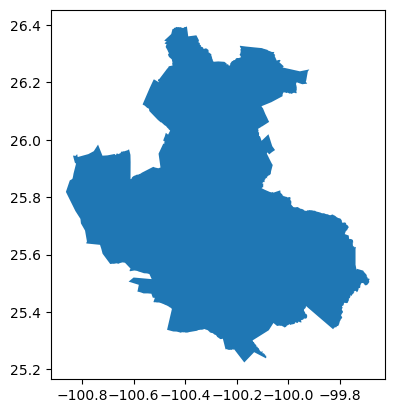

In [13]:
# Location of area of interest (Required)
schema = 'metropolis'
table = 'metro_gdf_2015'

query = f"SELECT * FROM {schema}.{table} WHERE \"city\" LIKE \'{city}%%\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')
mun_gdf.set_crs("EPSG:4326",inplace=True)

# Create dissolved area of interest
mun_gdf = mun_gdf.to_crs("EPSG:6372")
aoi = mun_gdf.dissolve()
aoi = aoi.to_crs("EPSG:4326")
aoi.plot()

### Load data - Additional amenities (libraries)

In [14]:
schema = 'denue'
table = 'denue_2020'

denue_gdf = aup.gdf_from_polygon(aoi,schema,table)

bibliotecas = denue_gdf.loc[(denue_gdf.codigo_act == 519121) | (denue_gdf.codigo_act == 519122)]
bibliotecas = bibliotecas[['codigo_act','geometry']]

del denue_gdf

# Show
print(bibliotecas.shape)
bibliotecas.head(1)

(209, 2)


,codigo_act,geometry
700,519122.0,POINT (-100.59989 25.80232)


In [15]:
pois = pd.concat([centro_cultural_final,dif_final,bibliotecas])
pois.rename(columns={'codigo_act':'code'},inplace=True)

# Show
print(pois.shape)
pois.head(1)

(363, 2)


,code,geometry
3,711312.0,POINT (-100.25350 25.79510)


### Step 1: Download OSMnx network (G, nodes and edges)

In [16]:
# Download osmnx network (G, nodes and edges from bounding box of aoi)
G, nodes, edges = aup.create_osmnx_network(aoi,how='from_bbox')

Extracted min and max coordinates from the municipality. Polygon N:26.39517, S:25.22379, E-99.6862, W-100.8619.
Created OSMnx graph from bounding box.
Converted OSMnx graph to 240756 nodes and 612178 edges GeoDataFrame.
Filtered columns.
Column: osmid in nodes gdf, has a list in it, the column data was converted to string.
Column: lanes in nodes gdf, has a list in it, the column data was converted to string.
Column: name in nodes gdf, has a list in it, the column data was converted to string.
Column: highway in nodes gdf, has a list in it, the column data was converted to string.
Column: maxspeed in nodes gdf, has a list in it, the column data was converted to string.
Column: ref in nodes gdf, has a list in it, the column data was converted to string.
Column: access in nodes gdf, has a list in it, the column data was converted to string.
Column: width in nodes gdf, has a list in it, the column data was converted to string.
Column: service in nodes gdf, has a list in it, the column data

### Step 2: Calculate distance from each poi to nearest node (osmid)

In [17]:
# Filter pois for aoi
pois_aoi = gpd.sjoin(pois,aoi,how='inner')
pois = pois_aoi[['code','geometry']]

# Format to calculate nearest
nodes_gdf = nodes.set_crs("EPSG:4326")
edges_gdf = edges.set_crs("EPSG:4326")
nodes_gdf = nodes_gdf.set_index('osmid')
edges_gdf = edges_gdf.set_index(["u", "v", "key"])

# Calculate nearest
nearest = aup.find_nearest(G, nodes_gdf, pois, return_distance= True)

#---------------------------------------------------------------------------------------------------------------------------------------------------------
print("Calculated distances from pois to nearest node.")
#---------------------------------------------------------------------------------------------------------------------------------------------------------

# Saves space in disk if instructed
if save_space:
    del nodes
    del edges
    #-----------------------------------------------------------------------------------------------------------------------------------------------------
    print("Saved space by deleting used data.")
    #-----------------------------------------------------------------------------------------------------------------------------------------------------

#Show
print(nearest.shape)
nearest.head(2)

Calculated distances from pois to nearest node.
(363, 4)


,code,geometry,osmid,distance_node
3,711312.0,POINT (-100.25350 25.79510),1950519761,37.600127
4,711312.0,POINT (-100.22668 25.72303),1154691863,24.617579


In [18]:
if local_save:
    nearest.to_file('../../../data/external/temporal_fromjupyter/02_pois_distance_node_filtered.gpkg', driver='GPKG')

### Step 3: Calculate distance to nearest source amenity for each node

In [38]:
# Create sources - code dicc out of main parameters dicc
sources = {}
for eje in parameters.keys():
    for amenity in parameters[eje]:
        for source in parameters[eje][amenity]:
            sources[source] = parameters[eje][amenity][source]

# Format
pois_distance_node = nearest.copy()
edges_gdf['length'].fillna(edges_gdf['length'].mean(),inplace=True)

# ELEMENTS NEEDED OUTSIDE THE LOOP - nodes_analysis is a nodes_gdf out of loop used in aup.calculate_distance_nearest_poi in each loop
nodes_analysis = nodes_gdf.reset_index().copy()
# ELEMENTS NEEDED OUTSIDE THE LOOP - nodes_sources is a nodes_gdf out of loop used to accumulate a final gdf with the minimal distance from each node to each source
nodes_sources = gpd.GeoDataFrame()
# ELEMENTS NEEDED OUTSIDE THE LOOP - Count
i = 0

# Loop that calculates distance from each node to each source (source by source)
for s in sources:
    
    # Locate pois data for current source
    source_gdf = gpd.GeoDataFrame()
    for cod in sources[s]:
        source_tmp = pois_distance_node[pois_distance_node['code']==cod]
        source_gdf = pd.concat([source_gdf,source_tmp])
    #-----------------------------------------------------------------------------------------------------------------------------------------------------
    print(f"Loaded a total of {len(source_gdf)} points of interest of the source {s} for analisis.")
    #-----------------------------------------------------------------------------------------------------------------------------------------------------
    
    # Data for current amenity loop - df_temp: Each column will be a batch of procesed nodes.
    df_temp = nodes_gdf.copy()
    # Data for current amenity loop - nodes_distance: Minimum time/distance found in all batches will be added from df_min (within if/elif/else) to nodes_distance and finally to nodes_sources (outside loop)
    nodes_distance = nodes_gdf.copy()
    
    # In case there are no amenities of a certain type in the city
    if len(source_gdf) == 0:
        nodes_time = nodes_distance.copy()
        nodes_time['time'] = 0
        #-------------------------------------------------------------------------------------------------------------------------------------------------
        print(f"0 points of interest of the source {s} found, time is NaN.")
        #-------------------------------------------------------------------------------------------------------------------------------------------------       
    
    # Elif, divide in batches processing (200 if the total number of pois is an exact multiple of 250, 250 otherwise)
    elif len(source_gdf) % 250:
        batch_size = len(source_gdf)/200
        for k in range(int(batch_size)+1):
            #---------------------------------------------------------------------------------------------------------------------------------------------
            print(f"Starting range k = {k} of {int(batch_size)} for source {s}.")
            #---------------------------------------------------------------------------------------------------------------------------------------------
            source_process = source_gdf.iloc[int(200*k):int(200*(1+k))].copy()
            nodes_distance_prep = aup.calculate_distance_nearest_poi(source_process, nodes_analysis, edges_gdf, s, 'osmid', wght='length')
            
            #A middle gdf is created whose columns will be the name of the amenity and the batch number it belongs to
            df_int = pd.DataFrame()
            df_int['dist_'+str(k)+s] = nodes_distance_prep['dist_'+s]
            
            #The middle gdf is merged into the previously created temporary gdf to store the data by node, each batch in a column.
            df_temp = df_temp.merge(df_int, left_index=True, right_index=True)
            
        # Once finished, drop the non-distance values from the temporary gdf
        df_temp.drop(['x', 'y', 'street_count','geometry'], inplace = True, axis=1)
        
        #We apply the min function to find the minimum value. This value is sent to a new df_min
        df_min = pd.DataFrame()
        df_min['dist_'+s] = df_temp.min(axis=1)
        
        #We merge df_min which contains the shortest distance to the POI with nodes_distance which will store all final data
        nodes_distance = nodes_distance.merge(df_min, left_index=True, right_index=True)
        
        #Final data gets converted to time, assuming a walking speed of 4km/hr
        nodes_time = nodes_distance.copy()
        nodes_time['time'] = (nodes_time['dist_'+s]*60)/4000
        
        #-------------------------------------------------------------------------------------------------------------------------------------------------
        print(f"Calculated time from nodes to pois for a total of {len(nodes_distance)} nodes for source {s}.")
        #------------------------------------------------------------------------------------------------------------------------------------------------- 

    # Else, divide in batches processing (200 if the total number of pois is an exact multiple of 250, 250 otherwise)   
    else:
        batch_size = len(source_gdf)/250
        for k in range(int(batch_size)+1):
            #---------------------------------------------------------------------------------------------------------------------------------------------
            print(f"Starting range k = {k} of {int(batch_size)} for source {s}.")
            #---------------------------------------------------------------------------------------------------------------------------------------------
            source_process = source_gdf.iloc[int(250*k):int(250*(1+k))].copy()
            nodes_distance_prep = aup.calculate_distance_nearest_poi(source_process, nodes_analysis, edges_gdf, s, 'osmid', wght='length')
            
            #A middle gdf is created whose columns will be the name of the amenity and the batch number it belongs to
            df_int = pd.DataFrame()
            df_int['dist_'+str(k)+s] = nodes_distance_prep['dist_'+s]
            
            #The middle gdf is merged into the previously created temporary gdf to store the data by node, each batch in a column.
            df_temp = df_temp.merge(df_int, left_index=True, right_index=True)
            
        # Once finished, drop the non-distance values from the temporary gdf
        df_temp.drop(['x', 'y', 'street_count','geometry'], inplace = True, axis=1)
        
        #We apply the min function to find the minimum value. This value is sent to a new df_min
        df_min = pd.DataFrame()
        df_min['dist_'+s] = df_temp.min(axis=1)
        
        #We merge df_min which contains the shortest distance to the POI with nodes_distance which will store all final data
        nodes_distance = nodes_distance.merge(df_min, left_index=True, right_index=True)
        
        #Final data gets converted to time, assuming a walking speed of 4km/hr
        nodes_time = nodes_distance.copy()
        nodes_time['time'] = (nodes_time['dist_'+s]*60)/4000
    
        #-------------------------------------------------------------------------------------------------------------------------------------------------
        print(f"Calculated time from nodes to pois for a total of {len(nodes_distance)} nodes for source {s}.")
        #-------------------------------------------------------------------------------------------------------------------------------------------------    
    
    #-----------------------------------------------------------------------------------------------------------------------------------------------------
    print("Applying final formating to calculated nodes.")
    #----------------------------------------------------------------------------------------------------------------------------------------------------- 
    
    #Format nodes_distance
    nodes_time['source'] = s
    nodes_time['city'] = city
    nodes_time.reset_index(inplace=True)
    nodes_time = nodes_time.set_crs("EPSG:4326")
    nodes_time = nodes_time[['osmid','time','source','city','x','y','geometry']]
    
    #If it is the first round nodes_sources is created equal to nodes_distance (all nodes, one source)
    #If it is the second or more, the new nodes_distance is merged.
    #This way we obtain the final gdf of interest that will contain the minimum disstance to each type of amenity by column.
    if i == 0:
        nodes_sources = nodes_time.copy()
    else:
        nodes_sources = pd.concat([nodes_sources,nodes_time])
        
    #-----------------------------------------------------------------------------------------------------------------------------------------------------
    print(f"Added time for source {s} to nodes_sources.")
    #-----------------------------------------------------------------------------------------------------------------------------------------------------
    
    i += 1

# Saves space in disk if instructed
if save_space:
    del nearest
    del nodes_gdf
    del nodes_analysis
    del source_tmp
    del source_gdf
    del df_temp
    del nodes_distance
    del nodes_time
    del source_process
    del nodes_distance_prep
    del df_int
    del df_min
    #-----------------------------------------------------------------------------------------------------------------------------------------------------
    print("Saved space by deleting used data.")
    #-----------------------------------------------------------------------------------------------------------------------------------------------------

#Show
print(nodes_sources.shape)
nodes_sources.head(2)

Loaded a total of 111 points of interest of the source denue_dif for analisis.
Starting range k = 0 of 0 for source denue_dif.
Calculated time from nodes to pois for a total of 240756 nodes for source denue_dif.
Applying final formating to calculated nodes.
Added time for source denue_dif to nodes_sources.
Loaded a total of 209 points of interest of the source denue_bibliotecas for analisis.
Starting range k = 0 of 1 for source denue_bibliotecas.
Starting range k = 1 of 1 for source denue_bibliotecas.
Calculated time from nodes to pois for a total of 240756 nodes for source denue_bibliotecas.
Applying final formating to calculated nodes.
Added time for source denue_bibliotecas to nodes_sources.
Loaded a total of 43 points of interest of the source denue_centrocultural for analisis.
Starting range k = 0 of 0 for source denue_centrocultural.
Calculated time from nodes to pois for a total of 240756 nodes for source denue_centrocultural.
Applying final formating to calculated nodes.
Added 

,osmid,time,source,city,x,y,geometry
0,316859918,94.03329,denue_dif,Monterrey,-100.037085,25.635101,POINT (-100.03709 25.63510)
1,316859925,13.46412,denue_dif,Monterrey,-99.995324,25.606418,POINT (-99.99532 25.60642)


In [39]:
nodes_sources.to_file('../../../data/external/temporal_fromjupyter/03_filtered_nodes_proximity_2020_concat.gpkg', driver='GPKG')